#  Predicting Bank Loan Eligibility from Loan Status Prediction Dataset

## Introduction

When an individual requests a loan from an entity such as a government, corporation or bank, they must submit an application in which they request the amount they need to borrow. The entity can approve or deny the request, based on factors such as the individual’s financial history and character. 

In our project, we are trying to predict whether or not a person will have their loan approved based on the characteristics described in the data set. This leads us to the question:
> Will a loan applicant have their loan approved or denied based on the applicant's income, co-applicant's income, loan amount (in thousands), and loan amount term (in months)?

This dataset compllied [here](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data) by Bhavik Jikadara contains loan status whether the bank gives the loan to a applicant and 12 chararcteristics of applicants, including categorical variables:

- Loan_ID: A unique loan ID.
- Gender: Either male or female.
- Married: Weather Married(yes) or Not Marttied(No).
- Dependents: Number of persons depending on the client.
- Education: Applicant Education(Graduate or Undergraduate).
- Self_Employed: Self-employed (Yes/No).
- Credit_History: Credit history meets guidelines.
- Property_Area: Applicants are living either Urban, Semi-Urban or Rural.

as well as quantitative variables:


- ApplicantIncome: Applicant income.
- CoapplicantIncome: Co-applicant income.
- LoanAmount: Loan amount in thousands.
- Loan_Amount_Term: Terms of the loan in months.

## Preliminary exploratory data analysis

The dataset is a .csv file with headers.  We’ll load it using `read_csv` function with no additional argument.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# reading the data

loan_data <- read_csv("Group Project/loan_data.csv")
loan_data

Rows: 381 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Pro...
dbl (5): ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
LP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y
LP001027,Male,Yes,2,Graduate,NA,2500,1840,109,360,1,Urban,Y
LP001029,Male,No,0,Graduate,No,1853,2840,114,360,1,Rural,N
LP001030,Male,Yes,2,Graduate,No,1299,1086,17,120,1,Urban,Y


The dataset is organized in a tidy format, enabling us to proceed with the next data analysis

In [8]:
# splitting between training and testing sets 

loan_split <- initial_split(loan_data, prop = 0.75, strata = Loan_Status) 
loan_training <- training(loan_split) 
loan_testing <- testing(loan_split) 

# exploratory data analysis (table) 

num_obs <- nrow (loan_data)
loan_counts <- loan_training |>
    group_by(Loan_Status) |>
    summarise(count  = n(),
              percentage = n()/num_obs *100) 

loan_counts
# means of the predictor variables we plan to use

loan_means <- loan_training |> 
    select(ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term) |>
    map_dfr(mean, na.rm = TRUE) 

loan_means

# count rows with missing data
loan_missing_data <- colSums(is.na(loan_training))

loan_missing_data

Loan_Status,count,percentage
<chr>,<int>,<dbl>
N,82,21.52231
Y,203,53.28084


ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
<dbl>,<dbl>,<dbl>,<dbl>
3557.554,1321.646,105.3263,341.7826


Loan_ID            Gender           Married        Dependents 
                0                 5                 0                 4 
        Education     Self_Employed   ApplicantIncome CoapplicantIncome 
                0                15                 0                 0 
       LoanAmount  Loan_Amount_Term    Credit_History     Property_Area 
                0                 9                25                 0 
      Loan_Status 
                0

Given that there are rows with missing entries for Loan_Amount_Term out of a total of 285 rows in the training data, we'll opt for mean imputation to fill these missing values instead of discarding a significant amount of data during our processing steps.

Warning message:
“Removed 8 rows containing non-finite values (`stat_bin()`).”


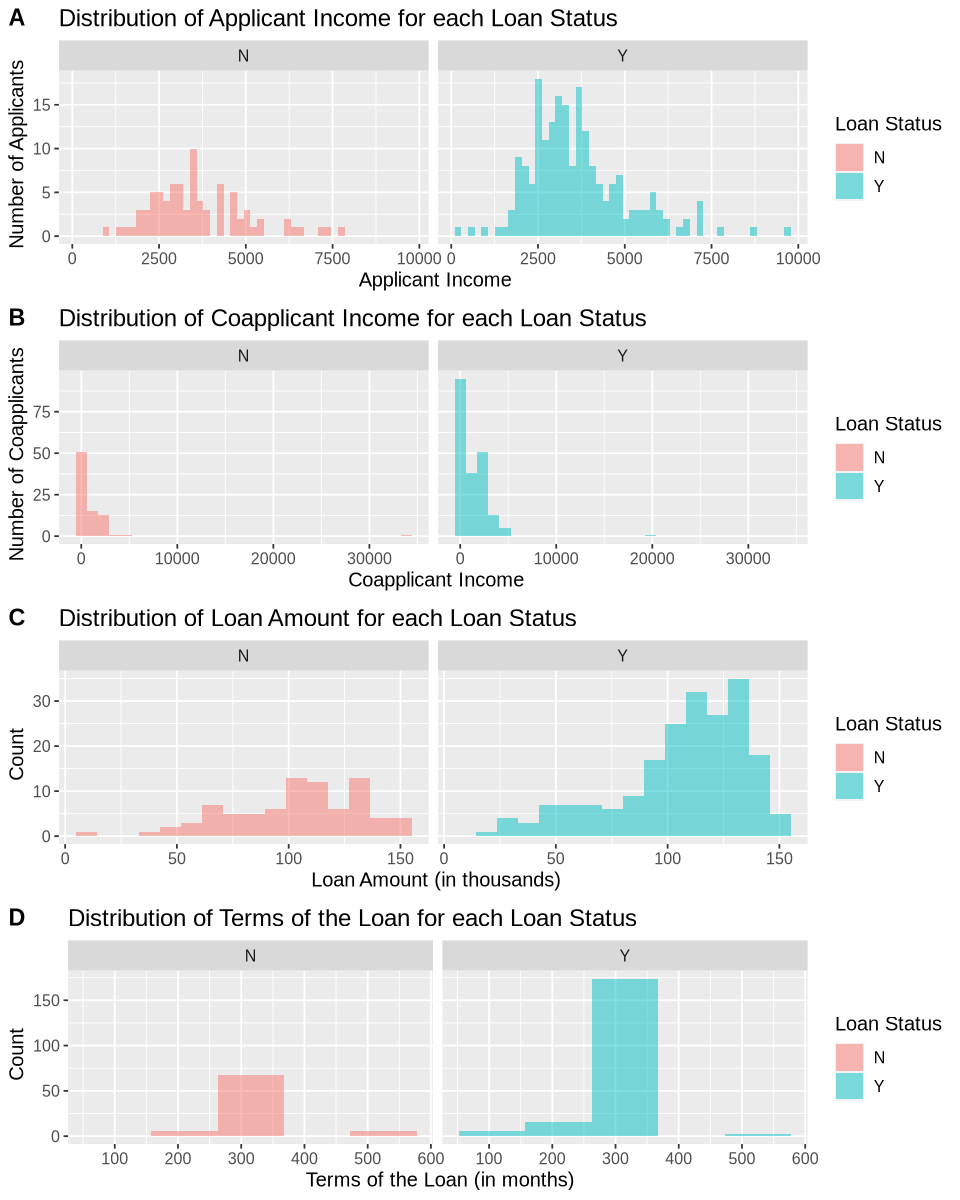

In [4]:
# exploratory data analysis (plots) 
options(repr.plot.width = 8, repr.plot.height = 10)
# distributions of each of the predictor variables

applicant_income_distribution <- loan_training |>
    ggplot(aes(x = ApplicantIncome, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins= 50)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Applicant Income",
           y = " Number of Applicants",
          title = "Distribution of Applicant Income for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

coapplicant_income_distribution <- loan_training |>
    ggplot(aes(x = CoapplicantIncome, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins=30)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Coapplicant Income",
           y = " Number of Coapplicants",
          title = "Distribution of Coapplicant Income for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

loan_amount_distribution <- loan_training |>
    ggplot(aes(x = LoanAmount, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins = 16)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Loan Amount (in thousands)",
           y = " Count",
          title = "Distribution of Loan Amount for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

loan_amount_term_distribution <- loan_training |>
    ggplot(aes(x = Loan_Amount_Term, fill = Loan_Status)) +
    geom_histogram(alpha = 0.5, position = "identity", bins= 5)+
    facet_grid (cols = vars (Loan_Status))+
    labs ( x = " Terms of the Loan (in months)",
           y = " Count",
          title = "Distribution of Terms of the Loan for each Loan Status",
          fill = "Loan Status")+
    theme(text = element_text (size = 12))

loan_distributions <- plot_grid (applicant_income_distribution,coapplicant_income_distribution,
                                 loan_amount_distribution,loan_amount_term_distribution, 
                                 ncol=1,
                                 labels = c("A", "B","C", "D"))
loan_distributions


## Methods 

**Selecting Predictors**

The selected columns from the dataset include numberical variables that describe the loan and the applicant's income, specifically:

- ApplicantIncome
- CoapplicantIncome
- LoanAmount (in thousands)
- Loan_Amount_Term (in months)

**Creating a Recipe**

We will need to create a recipe to be incorporated into the classification model using the K-nearest neighbors algorithm.Given the differences in range, means, and units among these predictors, it's necessary to scale and center them to ensure they each contribute the same weight to the model. To address the missing entries, we will include mean imputation as a step in the recipe.


**Tuning the Model**

We will use the training data to evaluate the classifer by comparing different K values. This involves conducting cross-validation to determine the accuracy of each K value and selecting the one that givess the highest accuracy.

**Evaluating on the Test Set**

we can build the workflow by adding the recipe and the K-NN classifer with the chosen K value to evaluate the quality of its prediction on the testing data.This can be obtained by calculating the prediction accuracy and examining the confusion matrix which provides details precision and recall of the classifer.

## Expected outcomes and significance

#### What do you expect to find?

Our final goal would be to find whether or not an applicant would get a loan using the different predictors in our analysis. To reach this goal, we will deduce the relationship between the our variables and the likelihood of an applicant getting a loan. In particular, we hope to see a pattern that shows a positive relationship between applicant income, co-applicant income, loan amount, the term of a loan, and the probability of an applicant getting their loan approved by a bank. 

#### What impact could such findings have?

These findings would make it easier for banks to decide which of the applicants should get a loan, based on the predictors we use in our classification problem. It allows for a more time and cost-effective solution to make decisions and prioritse those applicants who meet a certain criteria. Along with this, applicants who are aware of these criterion can base their decision making on it. For instance, applicants who are aware that banks priorise people who have higher incomes may decide to apply for a loan only after they have higher incomes. 

#### What future questions could this lead to?

Our analysis could lead to mechanistic questions about the underlying mechanism behind whether or not someone receives a loan. One could also pose an inferential question based on the preliminary exploratory data about how the variables in this data set can be applied to the wider population. Regression questions may also be formed through this analysis, wherein a quantitative value, such as a co-applicant's income, could be predicted using the applicant's income and other predictors. On a larger scale, different classifications can be made for different banks, and differences in loan approval criterion can be calculated. This would allow for applicants to make informed decisions on what bank would be the best fit for them to get their loan approved. 